In [18]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
dwarf="UMa_III"
ext = True

## Parse IRFs

In [3]:
runlist = printRunList(dwarf, package="EventDisplay", ext=ext, log_only=True)


for i, run in tqdm(enumerate(runlist), total=len(runlist)):
    ResponseFunction.EventDisplay(dwarf, run, from_log=True,
                                  mode="all", export=True, verbose=False, ext=ext)

  0%|          | 0/27 [00:00<?, ?it/s]

## Parse Events

In [4]:
Likelihood.EventDisplay.initialize(dwarf = dwarf, effCut=0.15, biasCut=0.2, export=False, ext=ext)

Events (dwarf: UMa_III) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_UMa_III_ext.npy.


Warning in <TClass::Init>: no dictionary for class VEvndispRunParameter is available
Warning in <TClass::Init>: no dictionary for class VGlobalRunParameter is available
Warning in <TClass::Init>: no dictionary for class VImageCleaningRunParameter is available
Warning in <TClass::Init>: no dictionary for class VTMVAEvaluatorResults is available
Warning in <TClass::Init>: no dictionary for class VTMVAEvaluatorData is available
Warning in <TClass::Init>: no dictionary for class VGammaHadronCuts is available
Warning in <TClass::Init>: no dictionary for class VAnalysisUtilities is available
Warning in <TClass::Init>: no dictionary for class VTimeMask is available
Warning in <TClass::Init>: no dictionary for class VAnaSumRunParameter is available
Warning in <TClass::Init>: no dictionary for class pair<int,VAnaSumRunParameterDataClass> is available
Warning in <TClass::Init>: no dictionary for class VAnaSumRunParameterDataClass is available
Warning in <TClass::Init>: no dictionary for class VA

## Check Event Distribution

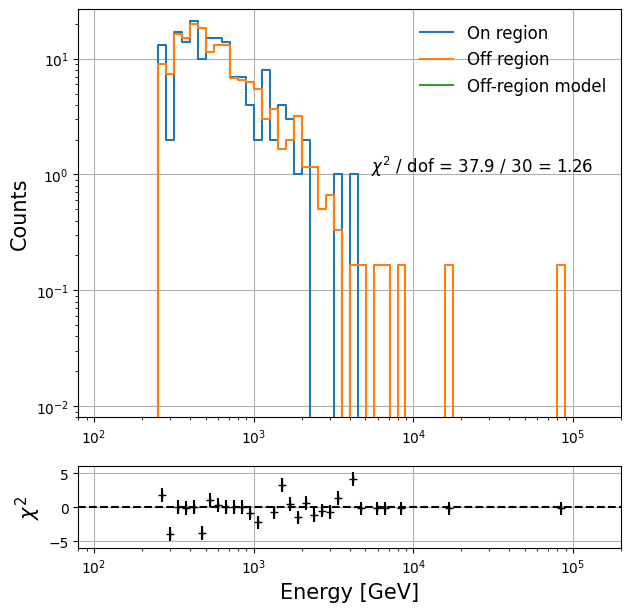

In [5]:
plotData(dwarf, ext=ext)

## Check J profile

log10(J factor) at 0.1 degree is 21.06


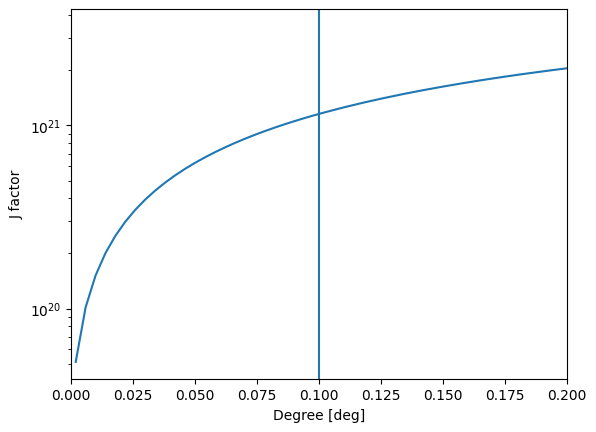

In [6]:
plt.plot(*JProfile.calcJval("UMa_III").T)
plt.xlabel("Degree [deg]")
plt.ylabel("J factor")
plt.yscale("log")
plt.xlim(0, 0.2)
plt.axvline(0.1)
jf = JProfile.calcJval("UMa_III", deg=0.1)
print(f"log10(J factor) at 0.1 degree is {np.log10(jf):.2f}")

## Generate convolved J profile

In [7]:
jprofile_iii = JProfile.generateConvolvedJ("UMa_III", ext=True, return_array=True)

  0%|          | 0/30 [00:00<?, ?it/s]

Text(0, 0.5, 'Convolved J factor')

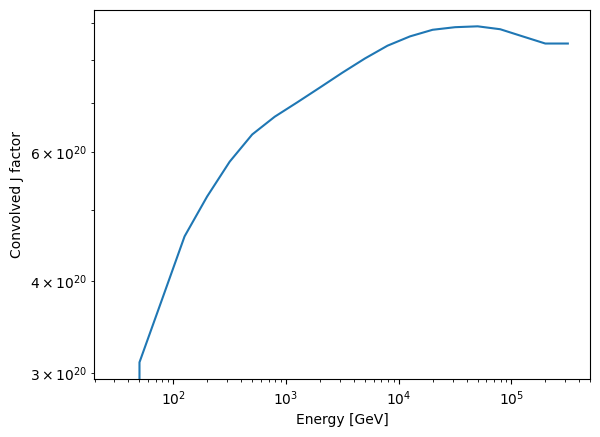

In [8]:
plt.plot(*jprofile_iii[0].T)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy [GeV]")
plt.ylabel("Convolved J factor")

## Compute an expected DM spectrum

In [9]:
channel= "tt"
M = 1000
hg_1d = Likelihood.combinedCalcSignal(dwarf, M, "EventDisplay", channel=channel, ext=ext)

(<cppyy.gbl.TCanvas object at 0x2a32e36d0>,
 <cppyy.gbl.TH1D object at 0x109edfbe0>)

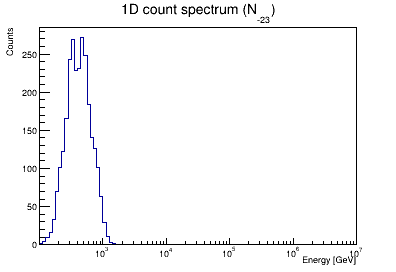

In [10]:
plotRoot(hg_1d, logx=True)

## Compute an upper limit

In [11]:
mle_1d = Likelihood.MLE(dwarf, M, channel=channel, ext=ext, signu=-25) 
mle_1d.minuit(method=2)

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=1000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-25.245) (equivalent to 5.69e-26)
[Log, Result] b = 1000 +/- 41 (null value: 1000)


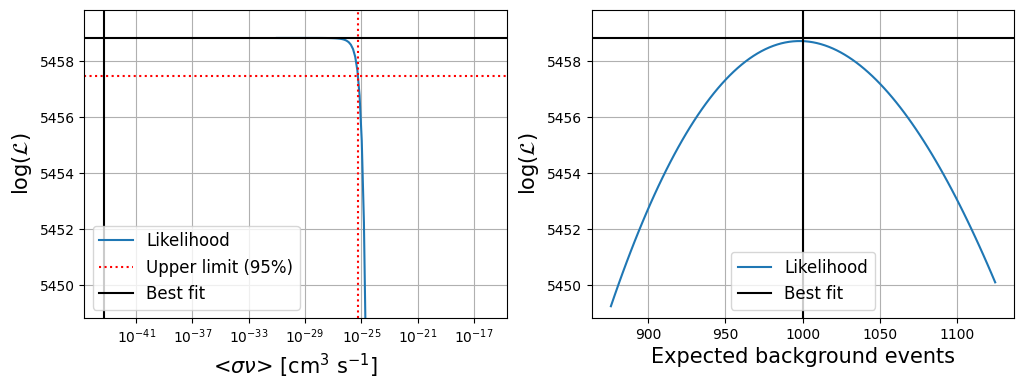

In [12]:
mle_1d.plotProfileLikelihood()

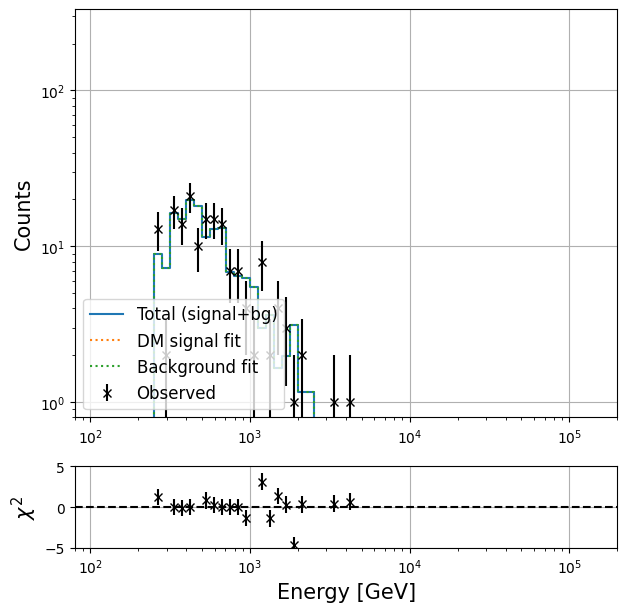

In [13]:
mle_1d.plotSED()

## Compute UL curve

[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_III
[Log] Channel      : tt
[Log] Dataset      : Extended (theta2=0.008)
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

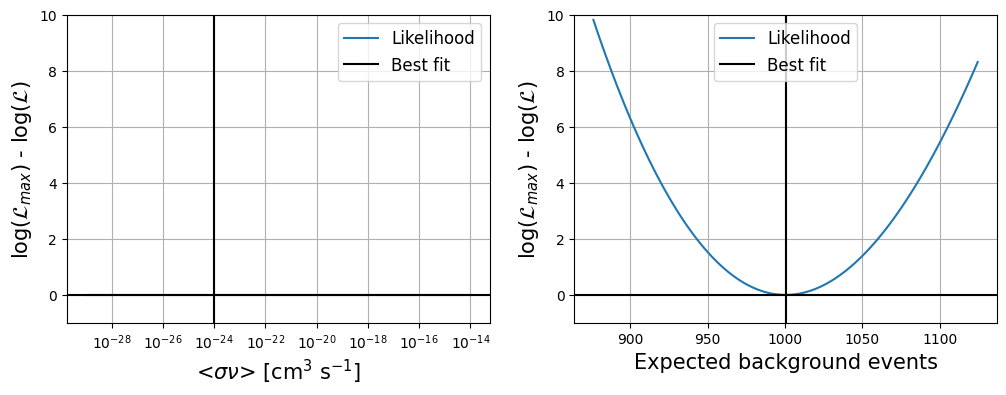

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/test_UMa_III.npy'


In [15]:
filename="test_UMa_III"
OUTPUT = Likelihood.calcUpperLimits(dwarf, channel,  method=2, filename=filename, ext=ext, signu=-25)

(0.1, 100)

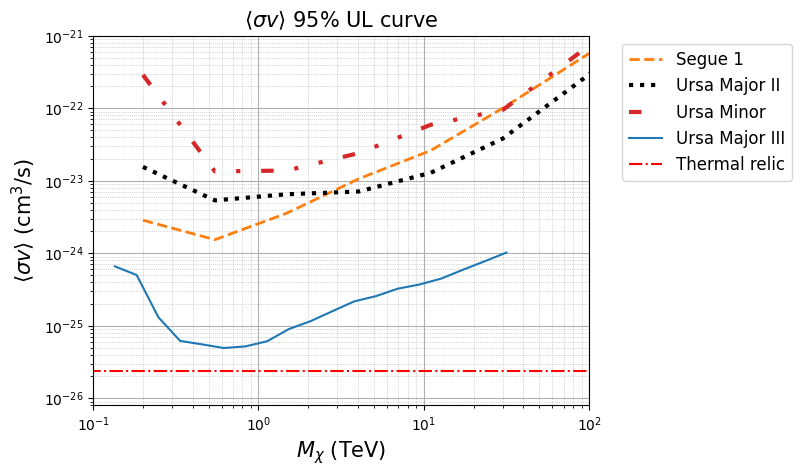

In [24]:

Likelihood.plotULcurve(f"EventDisplay_Segue_1_tt", units="TeV", ls="--", lw=2, label="Segue 1", color="C1", log_label=False, addRelic=False)
Likelihood.plotULcurve(f"EventDisplay_UMa_II_tt", units="TeV", ls=":", lw=3, label="Ursa Major II", color="k", log_label=False, addRelic=False)
Likelihood.plotULcurve(f"EventDisplay_UMi_tt", units="TeV", ls=(0, (3, 5, 1, 5, 1, 5)), lw=3, label="Ursa Minor", color="C3", log_label=False, addRelic=False)
plotULcurve("test_UMa_III",units="TeV", addRelic=True, label="Ursa Major III")
plt.ylim(8e-27, 1e-21)
plt.xlim(0.1, 100)